<a href="https://colab.research.google.com/github/Hirva-Bhagat/GooglePlaceReviewScraper/blob/master/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from gensim.models import Word2Vec


In [5]:
import nltk,csv,numpy
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize, pos_tag
sentences=[]
reader = csv.reader(open('/content/drive/My Drive/TWWReviews.csv', 'rU'), delimiter= ",",quotechar='|')
for line in reader:
    for field in line:
      sentences.append(word_tokenize(field))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """


[['UserName'], ['Reviews'], ['Rating'], ['Date'], ['Justine', 'Soucy'], ['``', 'THIS', 'IS', 'MY', 'HAPPY', 'PLACE', '.', 'I', "'ve", 'been', 'wanting', 'to', 'visit', 'Hogwarts', 'ever', 'since', 'it', 'was', 'announced', 'that', 'this', 'theme', 'park', 'was', 'in', 'construction', '.'], ['The', 'decor'], ['ambiance'], ['music'], ['and', 'details', 'are', 'all', 'so', 'great', 'and', 'well', 'executed', '.'], ['The', 'best', 'thing', 'ever', 'for', 'a', 'fan', '…', "''"], ['5', 'stars'], ['3', 'months', 'ago'], ['Nathan', 'Estes'], ['``', 'Extra', 'ordinary', 'place', 'to', 'hangout', 'with', 'kids', 'with', 'numerous', 'rides', 'such', 'as', 'roller', 'coasters', '🎢'], ['pacific', 'wheel', 'and', 'many', 'more', 'to', 'enjoy', 'late', 'night', '.', 'It', 'also', 'has', 'many', 'delicious', 'food', '🥘', 'stalls', '.', "''"], ['5', 'stars'], ['3', 'months', 'ago'], ['Keyla', 'Chamay', 'Pioquinto'], ['``', 'The', 'place', 'is', 'awesome', '!', 'Big', 'fan', 'of', 'the', 'whole', 'franc

In [6]:
from gensim.models import FastText
model = Word2Vec(sentences, size=20, min_count=1, window=2,sg=0)
#model = FastText(sentences, size=20, min_count=1, window=2,sg=0)

In [8]:
model.similarity('hogwarts','wizard')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.17017312

In [9]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
      wrd_vector = model[wrd_score[0]]
      word_labels.append(wrd_score[0])
      arr = np.append(arr, np.array([wrd_vector]), axis=0)
      
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


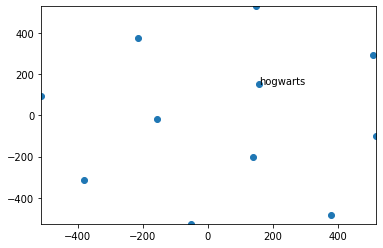

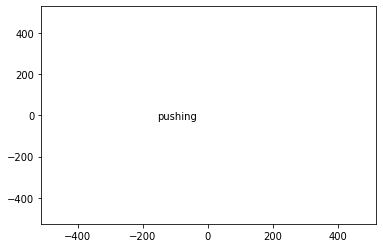

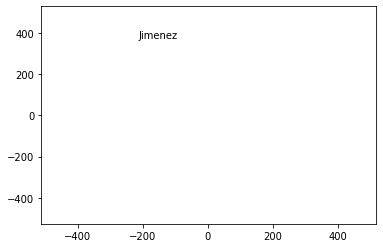

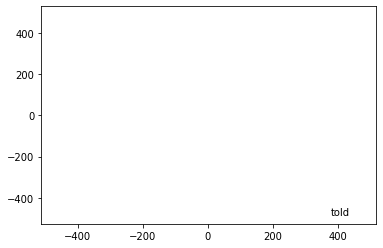

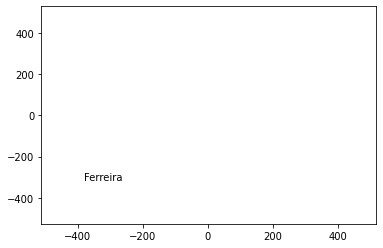

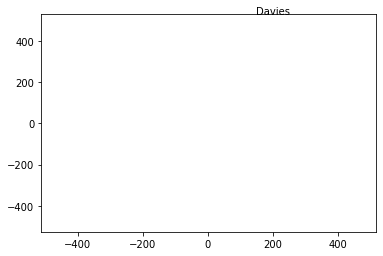

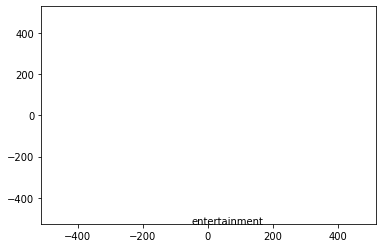

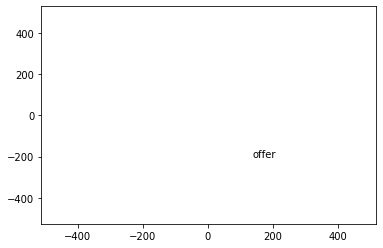

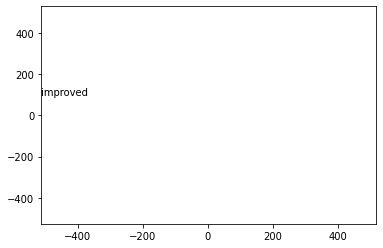

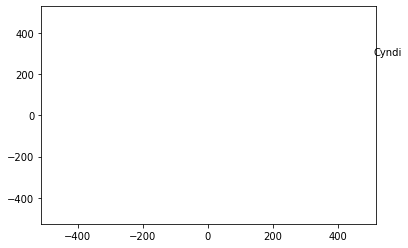

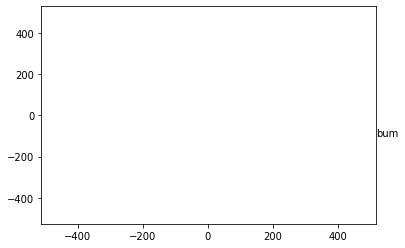

In [11]:
display_closestwords_tsnescatterplot(model, 'hogwarts', 20)

In [12]:
import numpy as np
 
def sent_vectorizer(sent, model):
    sent_vec = np.zeros(20)
    numw = 0
    for w in sent:
        try:
            sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    return sent_vec / np.sqrt(sent_vec.dot(sent_vec))
 
V=[]
for sentence in sentences:
    V.append(sent_vectorizer(sentence, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
